In [62]:
import math
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

(50000, 28, 28) (50000,)


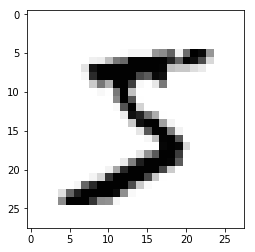

In [63]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [64]:
X_test.shape

(10000, 28, 28)

In [82]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [83]:
X_test.shape

(10000, 784)

In [68]:
import tensorflow as tf


In [69]:
X = tf.placeholder(tf.float32, shape=(None, 784))
Y = tf.placeholder(tf.float32, shape=(None, 10))
keep_prob = tf.placeholder(tf.float32)

In [71]:
W11 = tf.get_variable("W11",  [784, 128], initializer=tf.contrib.layers.xavier_initializer())
b11 = tf.get_variable("b11",  [128], initializer=tf.zeros_initializer())
W22 = tf.get_variable("W22",  [128, 128], initializer=tf.contrib.layers.xavier_initializer())
b22 = tf.get_variable("b22",  [128], initializer=tf.zeros_initializer())
W33 = tf.get_variable("W33", [128, 10], initializer=tf.contrib.layers.xavier_initializer())
b33 = tf.get_variable("b33",  [10], initializer=tf.zeros_initializer())

In [79]:
Z1 = tf.matmul(X, W11)+b11
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1, W22)+b22
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2, W33)+b33
A3 = tf.nn.sigmoid(Z3)

In [75]:
def compute_cost(A3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A3))
    return cost

In [76]:
cost = compute_cost(A3, Y)
starter_learning_rate = 0.0001
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.85, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [77]:
import numpy as np
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

Test cost after 10 epochs: 1.53384
Test cost after 20 epochs: 1.50943
Test cost after 30 epochs: 1.49742
Test cost after 40 epochs: 1.49006
Test cost after 50 epochs: 1.48463
Test cost after 60 epochs: 1.48065
Test cost after 70 epochs: 1.47772
Test cost after 80 epochs: 1.4754
Test cost after 90 epochs: 1.47348
Test cost after 100 epochs: 1.47224
Test cost after 110 epochs: 1.4711
Test cost after 120 epochs: 1.47034
Test cost after 130 epochs: 1.4695
Test cost after 140 epochs: 1.46895
Test cost after 150 epochs: 1.46845
Test cost after 160 epochs: 1.46802
Test cost after 170 epochs: 1.46777
Test cost after 180 epochs: 1.46748
Test cost after 190 epochs: 1.46722
Test cost after 200 epochs: 1.467


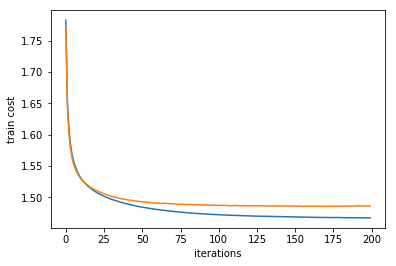

Train Accuracy: 0.99226
Test Accuracy: 0.9777


In [89]:
batch_size = 256
with tf.Session() as sess:
    sess.run(init)
    train_costs = []
    test_costs = []
    num_minibatches = int(50000 / batch_size)
    for epoch in range(200):
        
        for _ in range(num_minibatches):

                # Select a minibatch
                indices = np.random.choice(50000, batch_size)
                (minibatch_X, minibatch_Y) = X_train[indices], y_train[indices]
                sess.run(optimizer, feed_dict={X:minibatch_X, Y:minibatch_Y, keep_prob : 0.65})    
        
        #for i in range(0, 50000, batch_size):
            #sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size], keep_prob : 0.65})
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train, keep_prob : 1}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test, Y:y_test, keep_prob : 1}))
        if epoch%10 == 9:
            print("Test cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
    iterations = list(range(200))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('train test cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train, keep_prob : 1})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test, keep_prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)